# Bivariate Exploration of Data
---

## Scatterplots and Correlation
A **scatterplot** is used to show the relationship between *two quantitative variables*. The two variables are indicated on X and Y-axis, respectively. 

To quantify how strong the correlation is between the variables, we use a **correlation coefficient**. **Pearson correlation coefficient (r)** captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('support-files/04_Bivariate/fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


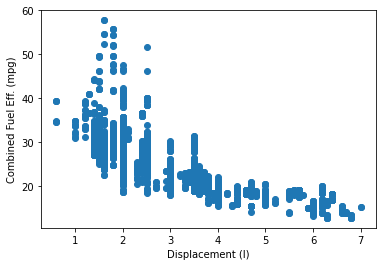

In [3]:
# the plot suggests a generally negative correlation 
# between engine size and fuel efficiency
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

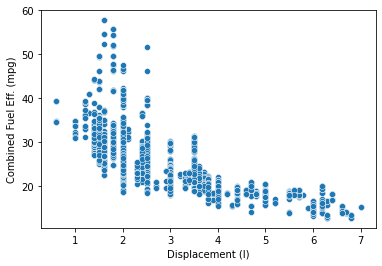

In [4]:
# using seaborn
sns.scatterplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

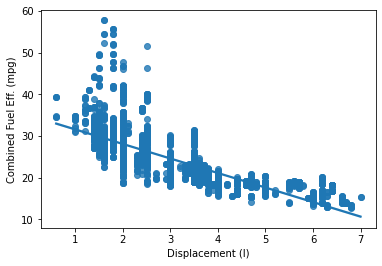

In [5]:
# seaborn's regplot combines the scatterplot
# with the fitting of a regression line to the data

# looking at the line, we can see that cars with lower displacements,
# and higher efficiency bring up the left side of the line
sns.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from *overplotting*, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

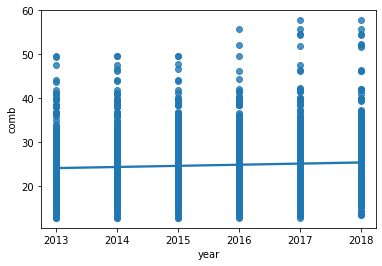

In [6]:
# the regression line that got fit suggests a slight
# upward trend in efficiency, but that's not clear from
# the data
sns.regplot(data=fuel_econ, x='year', y='comb');

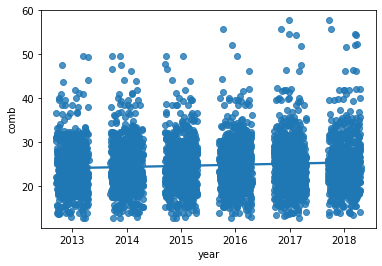

In [7]:
# this is a good opportunity to make use of jitter
# this is till not enough to see the points below the
# mid 30s
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3);

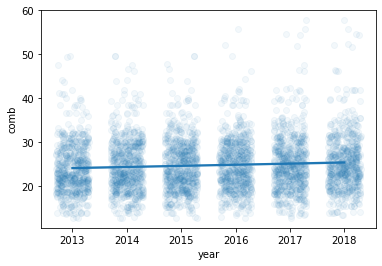

In [8]:
# now, we add some transparency
sns.regplot(data=fuel_econ, x='year', y='comb',
           x_jitter=0.3, scatter_kws={'alpha': 1/20});

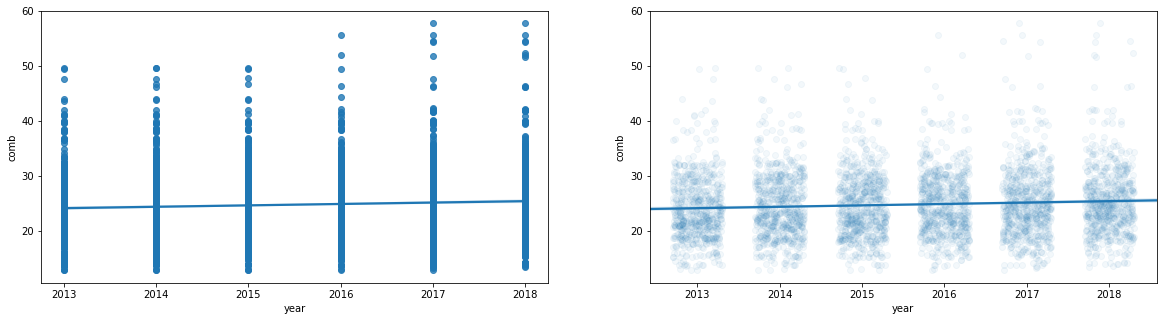

In [9]:
# pratice adding the two charts side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,5])

# plot 1: simple scatter 
sns.regplot(ax=axes[0], data=fuel_econ, x='year', y='comb')

# plot 2: scatter with transparency and jitter
sns.regplot(ax=axes[1], data=fuel_econ, x='year', y='comb',
           x_jitter=0.3, scatter_kws={'alpha': 1/20}, 
           truncate=False);

## Heat Maps
Heat maps for *quantitative variable* vs. *quantitative variable*. It's a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color.

They're good for:
- Discrete variable vs. discrete variable
- Good alternative to transparency for a lot of data
- Bin sizes are important! Too large a bin size, and you may fail to see the major trends in the data, and with too smaller bin size, you may end up distracted by noise.

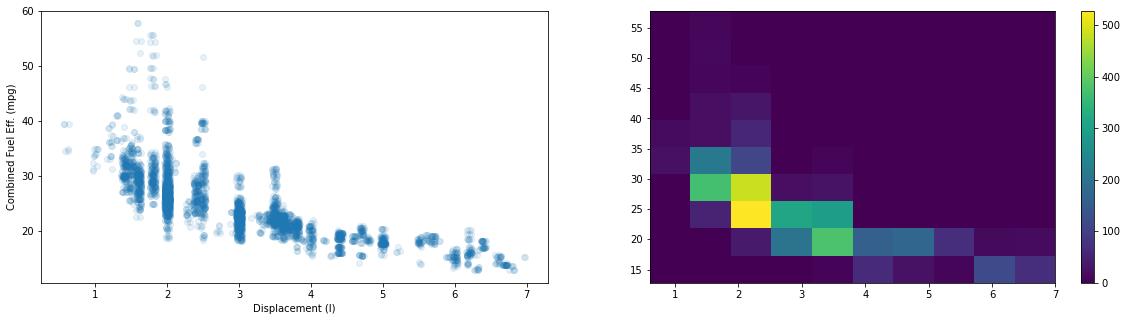

In [10]:
# coming back to the relationship between engine size (displacement) and combined fuel efficiency
# plotting a scatter and a heat map side-by-side

# size
plt.figure(figsize=[20,5])

# plot 1: scatter
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='displ', y='comb',
          x_jitter=0.04, scatter_kws={'alpha': 1/10},
          fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# plot 2: heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
# legend associating the counts to colors will be placed
# adjacent to the plot
plt.colorbar();

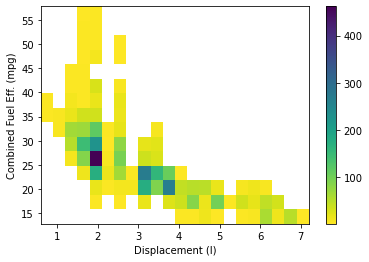

In [11]:
# improving the heat map above
# first, let set a minimum bound of counts
# before a rectangular area can be plotted
# by setting cmin=0.5, any bin with no counts
# will return as NaN and not get colored in

# since now white represents zero, a reverse
# color palette is better, in which darker colors
# are associated with higher values
# '_r' in cmap means reversed color map

# finally, let's choose the bins looking at the
# descriptive statistics below
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.3, 0.3)
bins_y = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+3, 3)

# now, we can see from the plot two areas of high frequency in
# the middle of the negative trend between fuel efficiency and engine size
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [12]:
# bin sizes of 0.3 for displ and 3 for fuel efficiency
# seem like a good idea
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


#### Add text annotation on each cell using [`pyplot.text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) function

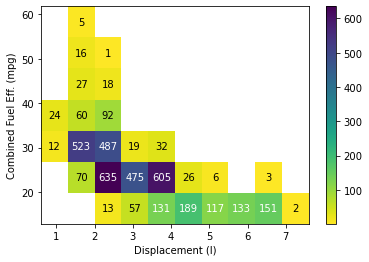

In [13]:
# specify bin edges
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.7, 0.7)
bins_y = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+7, 7)

# use cmin to set a minimum bound of counts
# use cmap to reverse the color map
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
                cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# select the bi-dimensional histogram, a 2d array of samples x and y
# values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension
counts = h2d[0]

# add text annotation on each cell
# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                    ha='center', va='center', color='black')

## Scatterplot Practice
#### **TO DO 1**: 
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?

In [14]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


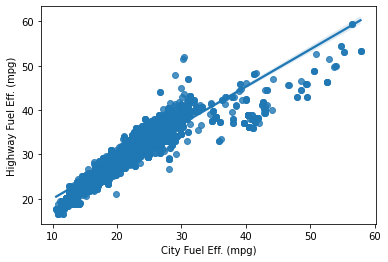

In [15]:
# the relationship between both variables is positive
sns.regplot(data=fuel_econ, x='city', y='highway')
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

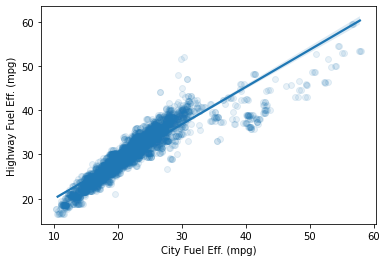

In [16]:
# adding some jitter and transparency
sns.regplot(data=fuel_econ, x='city', y='highway',
           x_jitter=0.4, scatter_kws={'alpha': 0.1})
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Interestingly, for most cars, highway mileage is clearly higher than city mileage, but for those cars with city mileage above 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.  It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function.

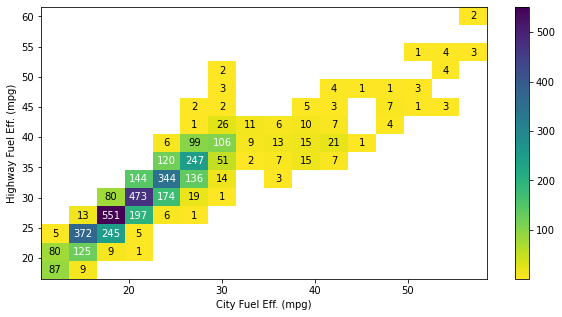

In [17]:
# now, let's use a heatmap for these two variables
bins_x = np.arange(fuel_econ['city'].min(), fuel_econ['city'].max()+3, 3)
bins_y = np.arange(fuel_econ['highway'].min(), fuel_econ['highway'].max()+3, 3)
plt.figure(figsize=[10,5])
h2d = plt.hist2d(data=fuel_econ, x='city', y='highway',
          cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+1.5, bins_y[j]+1.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+1.5, bins_y[j]+1.5, int(c),
                    ha='center', va='center', color='black')

In [18]:
fuel_econ[['city', 'highway']].describe()

,city,highway
count,3929.000000,3929.000000
mean,21.830462,29.973842
std,6.246273,5.747571
min,10.540200,16.559400
25%,17.746900,25.754200
50%,20.823200,29.633800
75%,24.981400,33.773100
max,57.808800,59.416900


#### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The `displ` variable has the former (in liters), while the `co2` variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [19]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


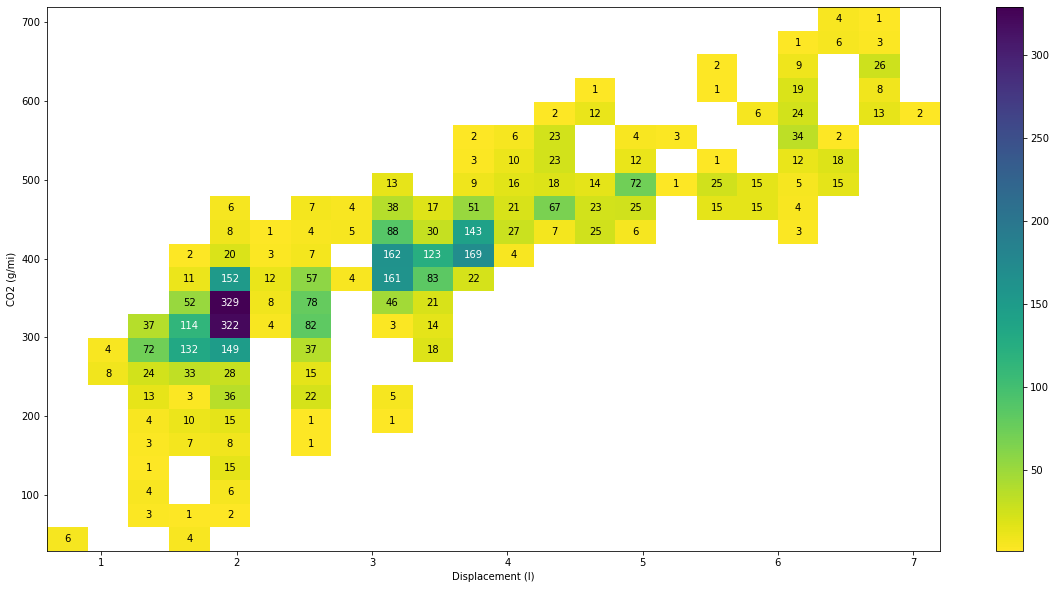

In [20]:
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.3, 0.3)
bins_y = np.arange(fuel_econ['co2'].min(), fuel_econ['co2'].max()+30, 30)
plt.figure(figsize=[20,10])
h2d = plt.hist2d(data=fuel_econ, x='displ', y='co2', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')
plt.colorbar();

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+0.15, bins_y[j]+15, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.15, bins_y[j]+15, int(c),
                    ha='center', va='center', color='black')

In [21]:
fuel_econ[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions.

---
## Violin Plots

In [22]:
# continue here!